In [56]:
import os
import pandas as pd

from pandas import DataFrame

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

#### Define system constants

In [ ]:
# working directory
pwd: str = os.environ['HOME'] + '/work/assignment/assignment-11'
file: str = pwd + '/NicholsNicki2004.txt'

#### Read the data file

In [20]:
df: DataFrame = pd.read_csv(file, sep='\t')

print(df.shape)
print(df.head())

(207, 36)
   ias1  ias2  ias3  ias4  ias5  ias6  ias7  ias8  ias9  ias10  ...  ias27  \
0     1     1     2     1     1     1     1     2     2      1  ...      3   
1     2     1     3     1     2     1     1     2     1      1  ...      3   
2     4     2     4     2     3     3     4     2     3      3  ...      3   
3     1     1     3     1     1     1     1     2     1      1  ...      1   
4     2     1     3     2     1     1     1     2     3      1  ...      3   

   ias28  ias29  ias30  ias31  ias32  ias33  ias34  ias35  ias36  
0      1      1      1      1      1      1      1      1      1  
1      1      1      1      2      1      2      1      1      1  
2      2      2      3      3      1      2      2      1      3  
3      1      1      1      2      1      1      1      1      1  
4      1      1      1      2      1      1      1      3      1  

[5 rows x 36 columns]


#### Identify 2 attributes with lowest mean & variance

In [17]:
mean = df.mean()
print(mean.sort_values(ascending=True).head())

ias34    1.111111
ias23    1.144928
ias6     1.222222
ias29    1.227053
ias15    1.231884
dtype: float64


In [18]:
var = df.var()
print(var.sort_values(ascending=True).head())

ias34    0.118662
ias23    0.182778
ias15    0.266357
ias28    0.317480
ias6     0.319310
dtype: float64


#### 2 Attributes with low mean & variance
- ias34 *(mean = 1.111, variance = 0.118)*
- ias23 *(mean = 1.144, variance = 0.182)*

#### Drop the 2 attributes with lowest mean & variance from the dataset

In [27]:
df_2: DataFrame = df.drop(columns=['ias34', 'ias23'])
print(df_2.shape)

(207, 34)


#### Correlation matrix for the remaining 34 attributes

In [28]:
corr: DataFrame = df_2.corr()
print(corr)

           ias1      ias2      ias3      ias4      ias5      ias6      ias7  \
ias1   1.000000  0.427736  0.462768  0.354683  0.517041  0.558645  0.478892   
ias2   0.427736  1.000000  0.330520  0.541461  0.379329  0.239192  0.394668   
ias3   0.462768  0.330520  1.000000  0.518899  0.474619  0.405834  0.485200   
ias4   0.354683  0.541461  0.518899  1.000000  0.462147  0.266996  0.451263   
ias5   0.517041  0.379329  0.474619  0.462147  1.000000  0.481312  0.429718   
ias6   0.558645  0.239192  0.405834  0.266996  0.481312  1.000000  0.497405   
ias7   0.478892  0.394668  0.485200  0.451263  0.429718  0.497405  1.000000   
ias8   0.476363  0.316346  0.624529  0.444075  0.588049  0.433835  0.465954   
ias9   0.512624  0.285332  0.500271  0.369303  0.508687  0.499149  0.541858   
ias10  0.431542  0.295806  0.401046  0.370661  0.520405  0.587692  0.601882   
ias11  0.418803  0.260113  0.428615  0.266908  0.336068  0.420593  0.407984   
ias12  0.426479  0.317615  0.456818  0.441042  0.437

#### Identify 3 attributes having lowest correlation with other attributes

Reference: <https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas>

In [54]:
pairs = corr.abs().unstack()
pairs_sorted = pairs.sort_values(kind='quicksort')

print(pairs_sorted.head(10))

ias13  ias16    0.099147
ias16  ias13    0.099147
ias13  ias6     0.103051
ias6   ias13    0.103051
ias9   ias22    0.104965
ias22  ias9     0.104965
ias15  ias13    0.112263
ias13  ias15    0.112263
       ias17    0.120179
ias17  ias13    0.120179
dtype: float64


#### 3 Attributes with low correlations
- ias13 & ias16 *(corr = 0.099)*
- ias13 & ias6 *(corr = 0.103)*

#### Drop the 3 attributes with lowest correlation from the dataset

In [35]:
df_3: DataFrame = df_2.drop(columns=['ias13', 'ias16', 'ias6'])
print(df_3.shape)

(207, 31)


#### Run PCA for all 31 components

In [40]:
pca = PCA(n_components=31)
pca.fit(df_3)

In [49]:
print('Explained variance => ', pca.explained_variance_)
print('Explained variance-ratio => ', pca.explained_variance_ratio_)

Explained variance =>  [9.2681561  1.23033901 1.11401475 0.93772474 0.85308408 0.76245672
 0.58719202 0.56716504 0.49754411 0.48581014 0.45560318 0.3842445
 0.36666026 0.35734082 0.32349705 0.29732644 0.28530487 0.26169806
 0.23432217 0.23018508 0.2077799  0.19547558 0.18048462 0.16334682
 0.14598061 0.13515158 0.10766817 0.08987661 0.07674352 0.06385759
 0.04419521]
Explained variance-ratio =>  [0.44323551 0.0588391  0.05327607 0.04484526 0.04079745 0.03646334
 0.02808157 0.02712381 0.02379429 0.02323313 0.02178853 0.01837591
 0.01753497 0.01708928 0.01547076 0.01421919 0.01364427 0.01251531
 0.0112061  0.01100825 0.00993676 0.00934832 0.0086314  0.00781181
 0.0069813  0.00646342 0.00514907 0.00429821 0.00367014 0.00305389
 0.00211357]


#### Run PCA for the retained components **(3)**
- 3 components satisfied the Kaiser's criterion *(Eigenvalue > 1)*

In [46]:
pca_2 = PCA(n_components=3)
pca_2.fit(df_3)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [53]:
print('Explained variance => ', pca_2.explained_variance_)
print('Explained variance-ratio => ', pca_2.explained_variance_ratio_)
print('Components => ', pca_2.components_)

Explained variance =>  [9.2681561  1.23033901 1.11401475]
Explained variance-ratio =>  [0.44323551 0.0588391  0.05327607]
Components =>  [[ 0.18418187  0.15262286  0.2611325   0.21444265  0.19724165  0.18331243
   0.29153402  0.22830758  0.15973791  0.1602521   0.20320789  0.13614779
   0.10775335  0.13902379  0.15005569  0.23878156  0.15838052  0.23680553
   0.06985409  0.23885156  0.14753276  0.1326409   0.175471    0.12504789
   0.13244358  0.1712365   0.18871614  0.10417555  0.17390368  0.1543113
   0.1456827 ]
 [ 0.03151018 -0.14429863 -0.35076446 -0.20249576  0.00250296  0.12752447
  -0.05642483  0.21318486  0.2066885   0.11677369  0.19616905  0.02710681
   0.04776372  0.19697278  0.24176355 -0.09411445  0.12702836  0.28295274
   0.00537876 -0.16201513  0.04191762  0.1042607  -0.30478604  0.12274852
   0.12324018 -0.01650091 -0.47566878 -0.04200516  0.07154983 -0.18696842
   0.13658974]
 [ 0.0298033   0.47777717  0.03619469  0.65658938  0.10482261  0.14218625
  -0.04642978  0.033

#### Visualize the contribution of the 31 attributes to each of the retained components

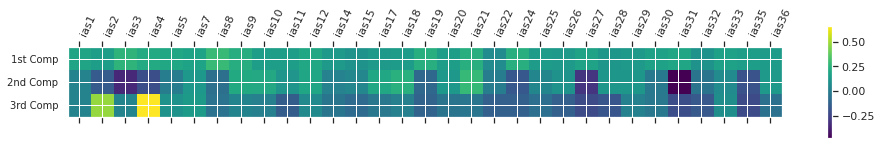

In [58]:
plt.matshow(pca_2.components_, cmap='viridis')
plt.yticks([0,1,2],['1st Comp','2nd Comp','3rd Comp'], fontsize=10)
plt.colorbar()
plt.xticks(range(len(df_3.columns)), df_3.columns, rotation=65, ha='left')
plt.show()
